In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset

from osgeo import gdal
import xarray as xr
import pickle

In [12]:
##AZUCAR
#load netcdf data
az_prec_raw = Dataset('src/Azucar_TraCE21ka_prec.nc')
az_rad_raw  = Dataset('src/Azucar_TraCE21ka_rad.nc')
az_temp_raw = Dataset('src/Azucar_TraCE21ka_temp.nc')
#convert to np.array
az_prec_raw = np.array(az_prec_raw['prec'][:])
az_rad_raw  = np.array(az_rad_raw['rad'][:])
az_temp_raw = np.array(az_temp_raw['temp'][:])
#convert dimensions
az_prec = [p * 10 for p in az_prec_raw[0]]
az_rad  = [r for r in az_rad_raw[0]]
az_temp = [t - 273.15 for t in az_temp_raw[0]]
#create dataframes (for moving window plots)
az_prec_pd = pd.DataFrame(az_prec)
az_rad_pd  = pd.DataFrame(az_rad)
az_temp_pd = pd.DataFrame(az_temp)

##SANTA GRACIA
#load netcdf data
sg_prec_raw = Dataset('src/SantaGracia_TraCE21ka_prec.nc')
sg_rad_raw  = Dataset('src/SantaGracia_TraCE21ka_rad.nc')
sg_temp_raw = Dataset('src/SantaGracia_TraCE21ka_temp.nc')
#convert to np.array
sg_prec_raw = np.array(sg_prec_raw['prec'][:])
sg_rad_raw  = np.array(sg_rad_raw['rad'][:])
sg_temp_raw = np.array(sg_temp_raw['temp'][:])
#convert dimensions
sg_prec = [p * 10 for p in sg_prec_raw[0]]
sg_rad  = [r for r in sg_rad_raw[0]]
sg_temp = [t - 273.15 for t in sg_temp_raw[0]]
#create dataframes (for moving window plots)
sg_prec_pd = pd.DataFrame(sg_prec)
sg_rad_pd  = pd.DataFrame(sg_rad)
sg_temp_pd = pd.DataFrame(sg_temp)

##LA CAMPANA
#load netcdf data
lc_prec_raw = Dataset('src/LaCampana_TraCE21ka_prec.nc')
lc_rad_raw  = Dataset('src/LaCampana_TraCE21ka_rad.nc')
lc_temp_raw = Dataset('src/LaCampana_TraCE21ka_temp.nc')
#convert to np.array
lc_prec_raw = np.array(lc_prec_raw['prec'][:])
lc_rad_raw  = np.array(lc_rad_raw['rad'][:])
lc_temp_raw = np.array(lc_temp_raw['temp'][:])
#convert dimensions
lc_prec = [p * 10 for p in lc_prec_raw[0]]
lc_rad  = [r for r in lc_rad_raw[0]]
lc_temp = [t - 273.15 for t in lc_temp_raw[0]]
#create dataframes (for moving window plots)
lc_prec_pd = pd.DataFrame(lc_prec)
lc_rad_pd  = pd.DataFrame(lc_rad)
lc_temp_pd = pd.DataFrame(lc_temp)

#NAHUELBUTA
#load netcdf data
na_prec_raw = Dataset('src/Nahuelbuta_TraCE21ka_prec.nc')
na_rad_raw  = Dataset('src/Nahuelbuta_TraCE21ka_rad.nc')
na_temp_raw = Dataset('src/Nahuelbuta_TraCE21ka_temp.nc')
#convert to np.array
na_prec_raw = np.array(na_prec_raw['prec'][:])
na_rad_raw  = np.array(na_rad_raw['rad'][:])
na_temp_raw = np.array(na_temp_raw['temp'][:])
#convert dimensions
na_prec = [p * 10 for p in na_prec_raw[0]]
na_rad  = [r for r in na_rad_raw[0]]
na_temp = [t - 273.15 for t in na_temp_raw[0]]
#create dataframes (for moving window plots)
na_prec_pd = pd.DataFrame(na_prec)
na_rad_pd  = pd.DataFrame(na_rad)
na_temp_pd = pd.DataFrame(na_temp)

In [3]:
## Create Rolling averages
#AZUCAR
az_prec_rolling = az_prec_pd.rolling(100, center = True).mean()
az_rad_rolling  = az_rad_pd.rolling(100, center = True).mean()
az_temp_rolling = az_temp_pd.rolling(100, center = True).mean()

#SANTA GRACIA
sg_prec_rolling = sg_prec_pd.rolling(100, center = True).mean()
sg_rad_rolling  = sg_rad_pd.rolling(100, center = True).mean()
sg_temp_rolling = sg_temp_pd.rolling(100, center = True).mean()

#LA CAMPANA
lc_prec_rolling = lc_prec_pd.rolling(100, center = True).mean()
lc_rad_rolling  = lc_rad_pd.rolling(100, center = True).mean()
lc_temp_rolling = lc_temp_pd.rolling(100, center = True).mean()

#NAHUELBUTA
na_prec_rolling = na_prec_pd.rolling(100, center = True).mean()
na_rad_rolling  = na_rad_pd.rolling(100, center = True).mean()
na_temp_rolling = na_temp_pd.rolling(100, center = True).mean()

In [4]:
ticks = [10000, 80000, 160000, 230000, 260000]
labels = ['21ka BP', '16ka BP', '8ka BP', '2ka BP', 'PD']

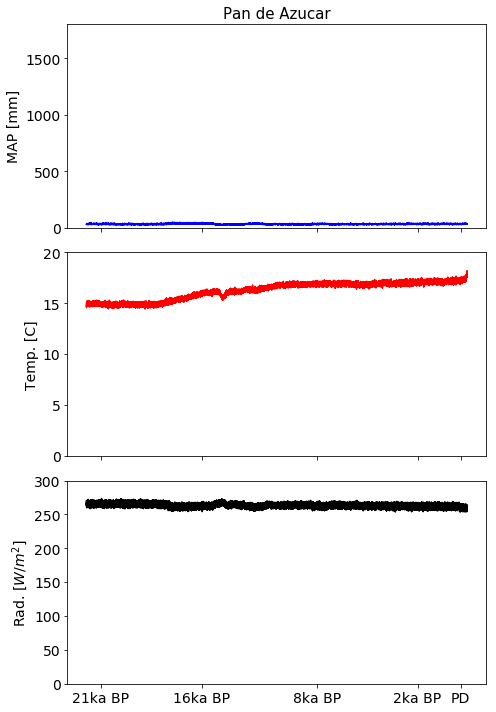

In [5]:

fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(az_prec_rolling , 'b')
ax[1].plot(az_temp_rolling, 'r')
ax[2].plot(az_rad_rolling, 'k')

#labeling
ax[0].set_title('Pan de Azucar', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)

#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)
    
plt.xticks(ticks, labels)
    
plt.tight_layout()
plt.savefig('azucar_tracedata.png')

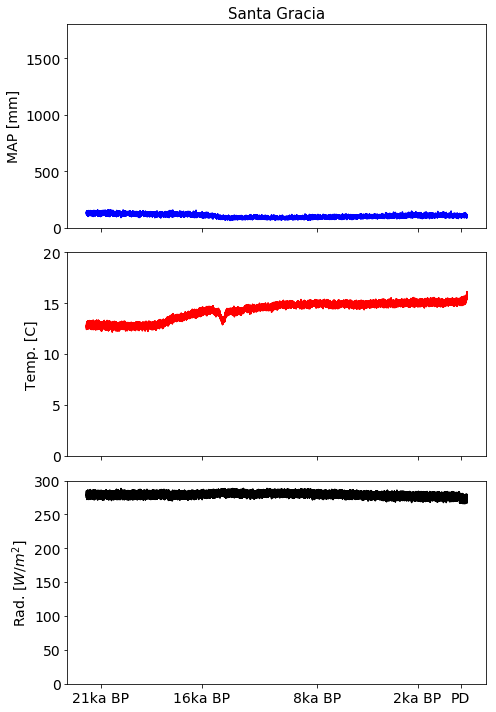

In [8]:
fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(sg_prec_rolling , 'b')
ax[1].plot(sg_temp_rolling, 'r')
ax[2].plot(sg_rad_rolling, 'k')

#labeling
ax[0].set_title('Santa Gracia', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)


#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)
 
plt.xticks(ticks, labels)
plt.tight_layout()
plt.savefig('santa_gracia_tracedata.png')


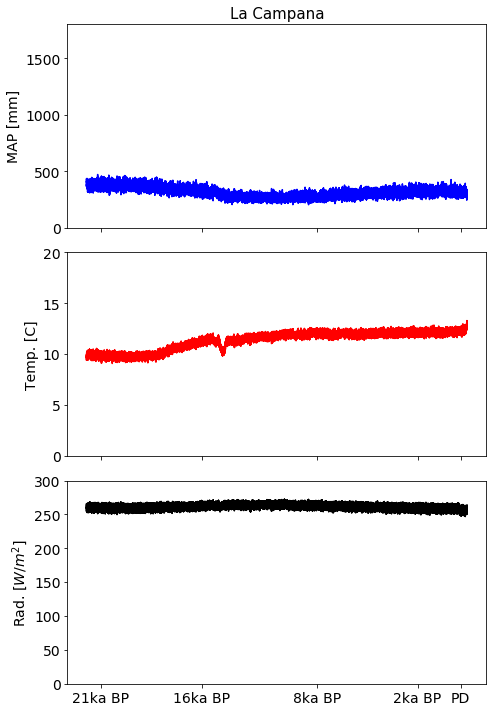

In [11]:
fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(lc_prec_rolling , 'b')
ax[1].plot(lc_temp_rolling, 'r')
ax[2].plot(lc_rad_rolling, 'k')

#labeling
ax[0].set_title('La Campana', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)


#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)

plt.xticks(ticks, labels)
plt.tight_layout()
plt.savefig('la_campana_tracedata.png')


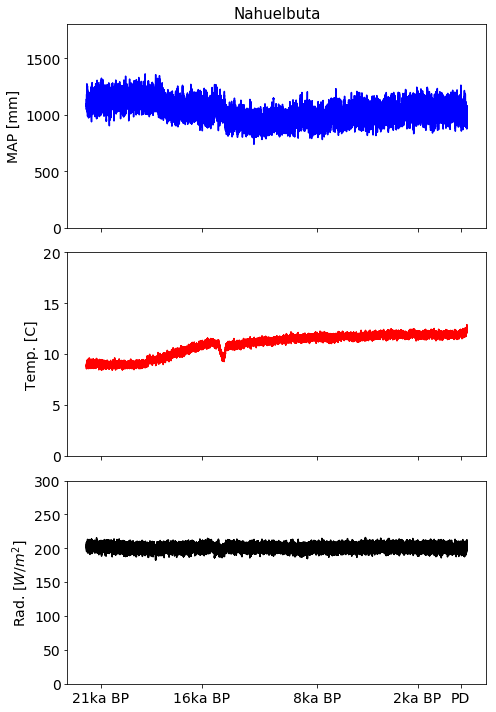

In [12]:
fig, ax = plt.subplots(3,1,
                      figsize = [7,10], 
                      sharex = True)

#plot the data
ax[0].plot(na_prec_rolling , 'b')
ax[1].plot(na_temp_rolling, 'r')
ax[2].plot(na_rad_rolling, 'k')

#labeling
ax[0].set_title('Nahuelbuta', fontsize = 15)
ax[0].set_ylabel('MAP [mm]', fontsize = 14)
ax[1].set_ylabel('Temp. [C]', fontsize = 14)
ax[2].set_ylabel('Rad. [$W/m^2$]', fontsize = 14)

#set axes limits
ax[0].set_ylim(0, 1800)
ax[1].set_ylim(0, 20)
ax[2].set_ylim(0, 300)


#set axes tick_params
for a in ax.flatten():
    a.axes.tick_params(labelsize = 14)
 
plt.xticks(ticks, labels)
plt.tight_layout()
plt.savefig('nahuelbuta_tracedata.png')


### Plots with all areas and Co2

In [23]:
#Co2
co2 = pd.read_csv('src/co2_TraCE_21ka_1990CE.txt', delim_whitespace = True, header = None)

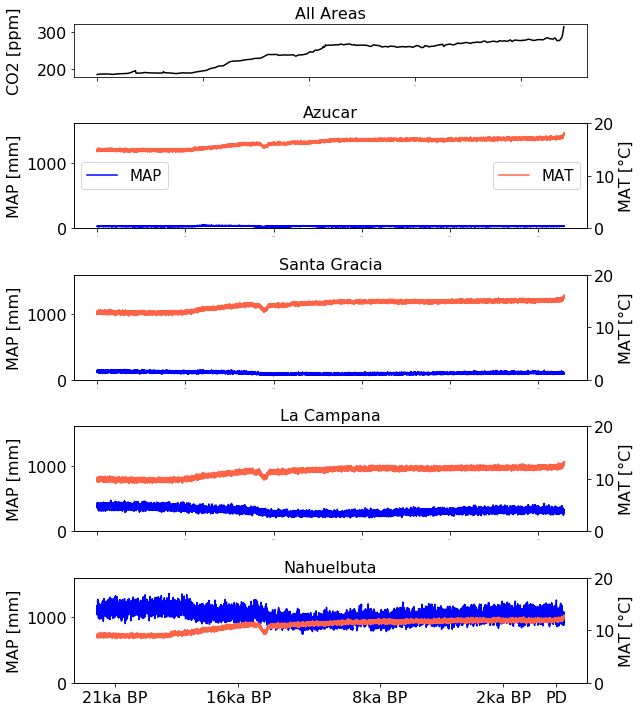

In [99]:

fig, ax = plt.subplots(nrows = 5,
                      ncols = 1, 
                      gridspec_kw = {'height_ratios' : [0.5,1,1,1,1] },
                      figsize = [9, 10])

#co2
ax[0].plot(co2[1][:-60], 'k')
#precip
ax[1].plot(az_prec_rolling, 'b', label = 'MAP')
ax[2].plot(sg_prec_rolling, 'b')
ax[3].plot(lc_prec_rolling, 'b')
ax[4].plot(na_prec_rolling, 'b')

#temp
ax1_y = ax[1].twinx()
ax2_y = ax[2].twinx()
ax3_y = ax[3].twinx()
ax4_y = ax[4].twinx()

ax1_y.plot(az_temp_rolling, 'tomato', label = 'MAT')
ax2_y.plot(sg_temp_rolling, 'tomato')
ax3_y.plot(lc_temp_rolling, 'tomato')
ax4_y.plot(na_temp_rolling, 'tomato')

#ylims
ax[1].set_ylim(0,1600)
ax[2].set_ylim(0,1600)
ax[3].set_ylim(0,1600)
ax[4].set_ylim(0,1600)

ax1_y.set_ylim(0,20)
ax2_y.set_ylim(0,20)
ax3_y.set_ylim(0,20)
ax4_y.set_ylim(0,20)

#ylabels
ax[0].set_ylabel('CO2 [ppm]', fontsize = 16)
ax[0].get_yaxis().set_label_coords(-0.10,0.5)
ax[1].set_ylabel('MAP [mm]', fontsize = 16)
ax[2].set_ylabel('MAP [mm]', fontsize = 16)
ax[3].set_ylabel('MAP [mm]', fontsize = 16)
ax[4].set_ylabel('MAP [mm]', fontsize = 16)

ax1_y.set_ylabel('MAT [' + u"\u00b0" +'C]', fontsize = 16)
ax2_y.set_ylabel('MAT [' + u"\u00b0" +'C]', fontsize = 16)
ax3_y.set_ylabel('MAT [' + u"\u00b0" +'C]', fontsize = 16)
ax4_y.set_ylabel('MAT [' + u"\u00b0" +'C]', fontsize = 16)

#titles
ax[0].set_title('All Areas', fontsize = 16)
ax[1].set_title('Azucar', fontsize = 16)
ax[2].set_title('Santa Gracia', fontsize = 16)
ax[3].set_title('La Campana', fontsize = 16)
ax[4].set_title('Nahuelbuta', fontsize = 16)

#legend
ax[1].legend(loc = 'center left', fontsize = 15)
ax1_y.legend(loc = 'center right', fontsize = 15)

#tick_params
for i,j in zip([0,1,2,3], [ax1_y, ax2_y, ax3_y, ax4_y]):
    ax[i].axes.tick_params(axis = 'x', labelsize = 0)
    ax[i].axes.tick_params(axis = 'y', labelsize = 16)
    j.axes.tick_params(axis = 'y', labelsize = 16)
ax[4].axes.tick_params(labelsize = 16)

plt.xticks(ticks, labels)
  
plt.tight_layout()    

plt.savefig('all_areas_climate_co2.png')

In [88]:
u"\u00b0"

'°'